In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
N_grid=34698

t_start=1913.5
t_end=2008.5
t=np.linspace(t_start, t_end, N_grid)
h=t[1]-t[0]

dw=0.1
p=365*11+2

W=2*np.pi/11
T=11

st=int(p/2)+1
fn=N_grid-st-1

In [3]:
s=44
T_sin=s*365
m=1.5
eps=np.pi/2-0.1

weight=0.5

k0_s=weight*(np.sin((2*np.pi)/s*t+eps)+m)

In [4]:
alpha=0.999
wait_time=int(1/(1-alpha))*3
sigma=0.005
t_t=np.linspace(t_start-wait_time/365, t_end, N_grid+wait_time)
k0_clear=weight*(np.sin((2*np.pi)/s*t_t+eps)+m)

In [5]:
res=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3011/PT3011_k_hat_sine+ar_single_0.005_dw_0.1W3.out', delimiter=',')
res2=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3011/PT3011_k_hat_sine+ar_single_0.001_dw_0.1W3.out', delimiter=',')
res3=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3011/PT3011_k_hat_sine+ar_single_0.01_dw_0.1W3.out', delimiter=',')

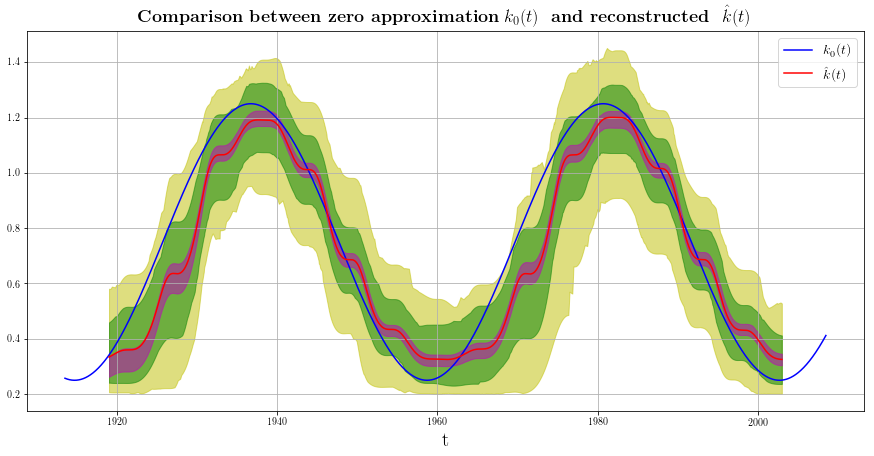

In [8]:

    
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0_s, 'b')
plt.plot(t[st:fn+1], np.mean(res, axis=1), 'r')


k_hat_l=np.zeros(fn-st+1)
k_hat_u=np.zeros(fn-st+1)

for i in range(fn+1-st):
    k_hat_l[i]=sorted(res3[i,:])[4]
    k_hat_u[i]=sorted(res3[i,:])[145]

plt.fill_between(t[st:fn+1], k_hat_l, k_hat_u, color="y", alpha=0.5)

k_hat_l=np.zeros(fn-st+1)
k_hat_u=np.zeros(fn-st+1)

for i in range(fn+1-st):
    k_hat_l[i]=sorted(res[i,:])[4]
    k_hat_u[i]=sorted(res[i,:])[145]
    
plt.fill_between(t[st:fn+1], k_hat_l, k_hat_u, color="g", alpha=0.5)

k_hat_l=np.zeros(fn-st+1)
k_hat_u=np.zeros(fn-st+1)

for i in range(fn+1-st):
    k_hat_l[i]=sorted(res2[i,:])[4]
    k_hat_u[i]=sorted(res2[i,:])[145]

plt.fill_between(t[st:fn+1], k_hat_l, k_hat_u, color="m", alpha=0.5)

plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

In [4]:
res_h=np.zeros(fn-st+1)
res2_h=np.zeros(fn-st+1)
res3_h=np.zeros(fn-st+1)

for i in range(fn+1-st):
    res_h[i]=sorted(res[i,:])[145]-sorted(res[i,:])[4]
    res2_h[i]=sorted(res2[i,:])[145]-sorted(res2[i,:])[4]
    res3_h[i]=sorted(res3[i,:])[145]-sorted(res3[i,:])[4]

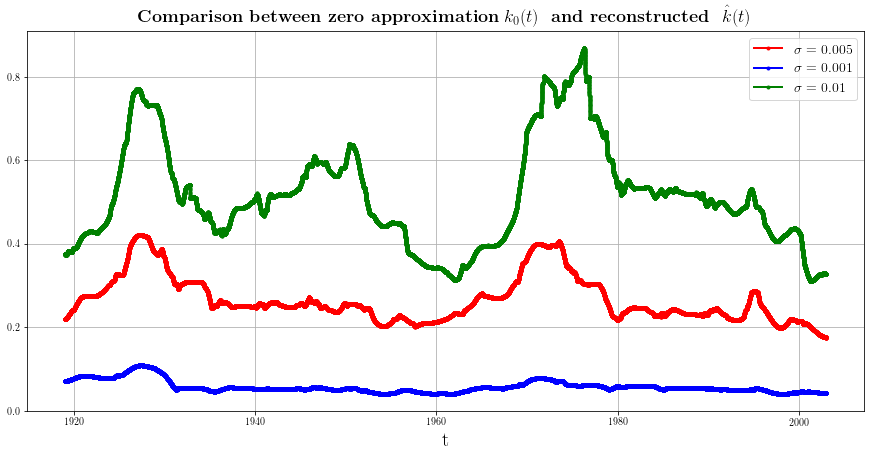

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn+1], res_h, 'r.-', linewidth=2)
plt.plot(t[st:fn+1], res2_h, 'b.-', linewidth=2)
plt.plot(t[st:fn+1], res3_h, 'g.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

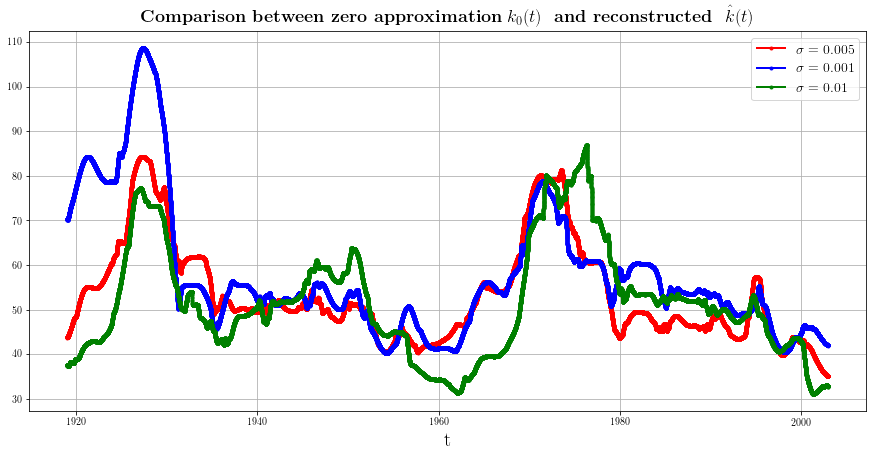

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn+1], res_h/0.005, 'r.-', linewidth=2)
plt.plot(t[st:fn+1], res2_h/0.001, 'b.-', linewidth=2)
plt.plot(t[st:fn+1], res3_h/0.01, 'g.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

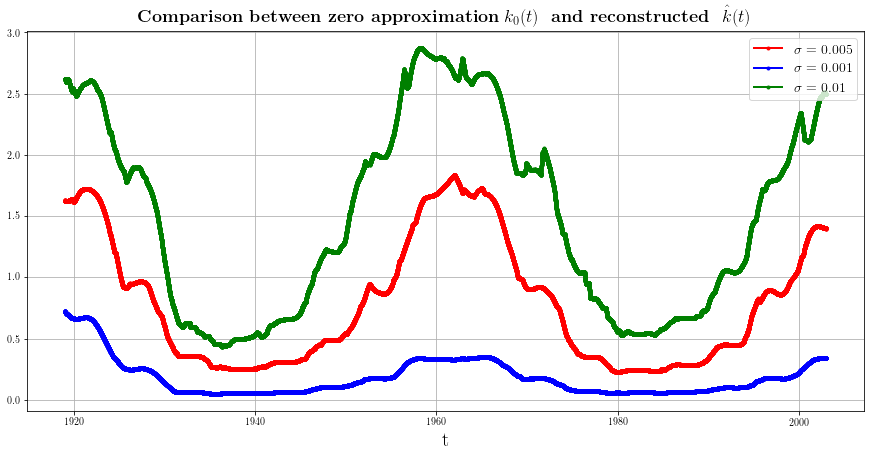

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn+1], np.divide(res_h, np.mean(res, axis=1)-2*dw), 'r.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res2_h, np.mean(res2, axis=1)-2*dw), 'b.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res3_h, np.mean(res3, axis=1)-2*dw), 'g.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

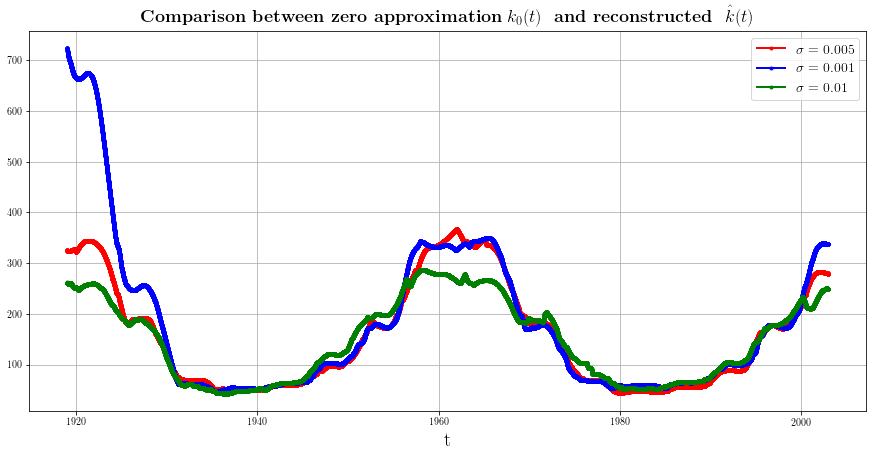

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim(50, 400)
plt.plot(t[st:fn+1], np.divide(res_h, np.mean(res, axis=1)-2*dw)/0.005, 'r.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res2_h, np.mean(res2, axis=1)-2*dw)/0.001, 'b.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res3_h, np.mean(res3, axis=1)-2*dw)/0.01, 'g.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

In [9]:
res=np.loadtxt('PT3011_k_hat_sine+ar_single_0.005_dw_0.1W3.out', delimiter=',')
res2=np.loadtxt('PT3011_k_hat_sine+ar_single_0.005_dw_0.05W3.out', delimiter=',')
res3=np.loadtxt('PT3011_k_hat_sine+ar_single_0.005_dw_0.115W3.out', delimiter=',')
res4=np.loadtxt('PT3011_k_hat_sine+ar_single_0.005_dw_0.15W3.out', delimiter=',')

In [10]:
res_h=np.zeros(fn-st+1)
res2_h=np.zeros(fn-st+1)
res3_h=np.zeros(fn-st+1)
res4_h=np.zeros(fn-st+1)

for i in range(fn+1-st):
    res_h[i]=sorted(res[i,:])[145]-sorted(res[i,:])[4]
    res2_h[i]=sorted(res2[i,:])[145]-sorted(res2[i,:])[4]
    res3_h[i]=sorted(res3[i,:])[145]-sorted(res3[i,:])[4]
    res4_h[i]=sorted(res4[i,:])[145]-sorted(res4[i,:])[4]

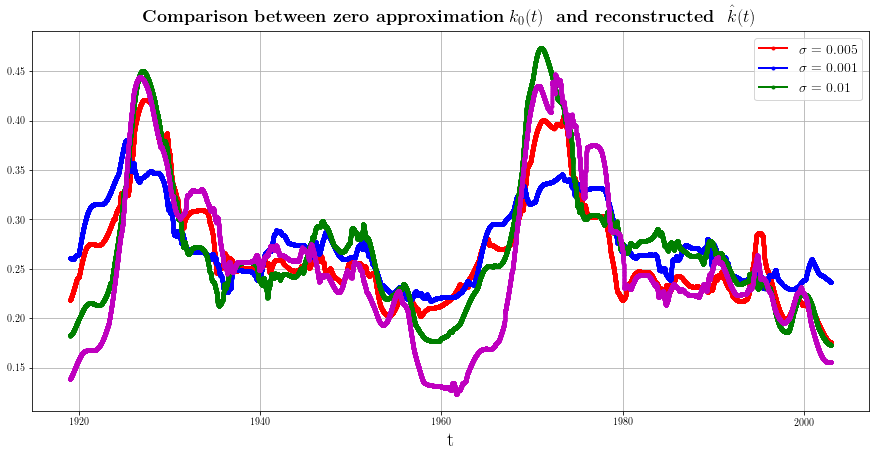

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn+1], res_h, 'r.-', linewidth=2)
plt.plot(t[st:fn+1], res2_h, 'b.-', linewidth=2)
plt.plot(t[st:fn+1], res3_h, 'g.-', linewidth=2)
plt.plot(t[st:fn+1], res4_h, 'm.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

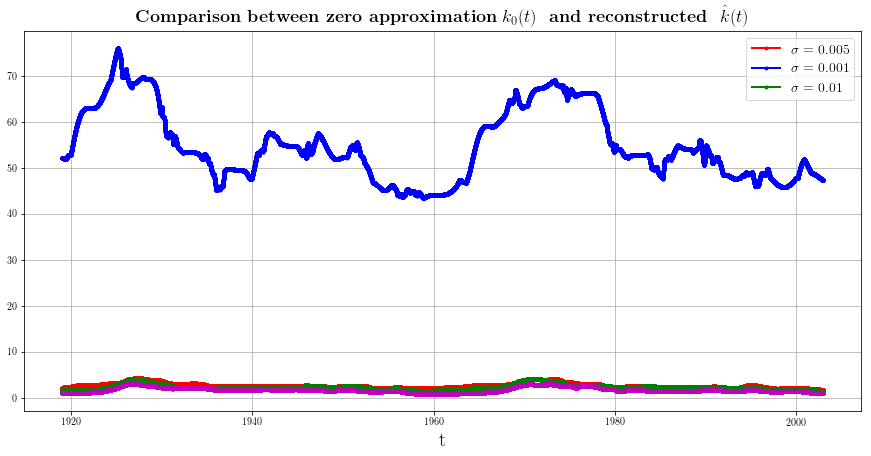

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn+1], res_h/0.1, 'r.-', linewidth=2)
plt.plot(t[st:fn+1], res2_h/0.005, 'b.-', linewidth=2)
plt.plot(t[st:fn+1], res3_h/0.115, 'g.-', linewidth=2)
plt.plot(t[st:fn+1], res4_h/0.15, 'm.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

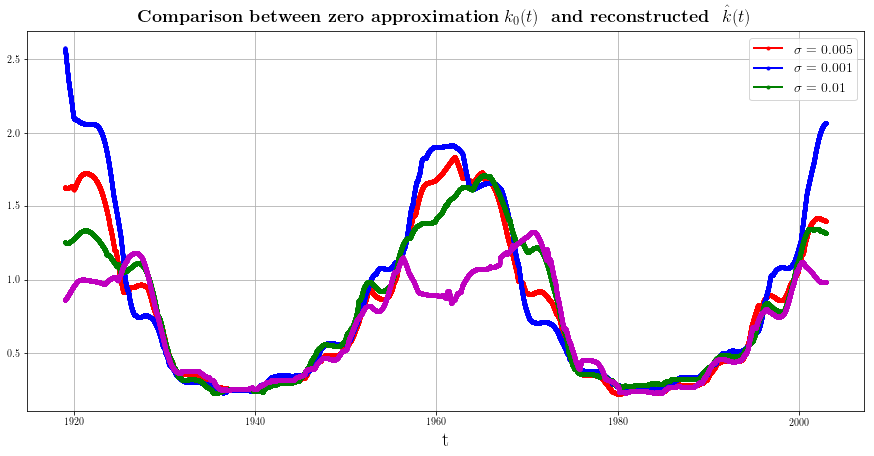

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn+1], np.divide(res_h, np.mean(res, axis=1)-2*dw), 'r.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res2_h, np.mean(res2, axis=1)-2*dw), 'b.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res3_h, np.mean(res3, axis=1)-2*dw), 'g.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res4_h, np.mean(res4, axis=1)-2*dw), 'm.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim(50, 400)
plt.plot(t[st:fn+1], np.divide(res_h, np.mean(res, axis=1)-2*dw)/0.005, 'r.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res2_h, np.mean(res2, axis=1)-2*dw)/0.001, 'b.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(res3_h, np.mean(res3, axis=1)-2*dw)/0.01, 'g.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$\sigma=0.005$', r'$\sigma=0.001$', r'$\sigma=0.01$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()